# IMPORTS

In [1]:
from data_pre import create_dataframe,rolling_means,normal_data_Standard,normal_data_MinMax,window_data,get_balanced_dataset,test_normality_anderson,correlation_analysis,descritize_by_bounds,data_agg,pca_test
from make_plots import plot_activity,plot_histograms_qqplots,create_corr_matrix,cluster3D,cluster2D
from clustering import try_kmeans,try_minibatch_kmeans,try_dbscan,try_birch
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from classification_models import bay_net_structure,random_forest,nn

2024-05-09 14:19:53.689786: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-09 14:19:53.691482: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 14:19:53.729721: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-09 14:19:53.730520: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 14:19:54.394705: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
data=create_dataframe()
data=data.drop(columns=['index','Unnamed: 0'])
print(data)

                      timestamp    back_x    back_y    back_z   thigh_x   
0       2019-01-12 00:00:00.000 -1.455469  0.199820 -0.000919 -0.658926  \
1       2019-01-12 00:00:00.020 -0.969411 -0.113875  0.068938 -0.765164   
2       2019-01-12 00:00:00.040 -0.728391  0.000811  0.341911 -0.579921   
3       2019-01-12 00:00:00.060 -0.859020  0.222991  0.012635 -0.127765   
4       2019-01-12 00:00:00.080 -0.561594  0.189641  0.098114 -0.809730   
...                         ...       ...       ...       ...       ...   
369072  2000-01-01 02:08:57.440 -1.078255 -0.032525 -0.122538 -1.019306   
369073  2000-01-01 02:08:57.460 -0.939147 -0.098742 -0.093985 -0.910196   
369074  2000-01-01 02:08:57.480 -1.113698 -0.016504 -0.122909 -1.048986   
369075  2000-01-01 02:08:57.500 -0.879172 -0.125930 -0.061131 -0.858325   
369076  2000-01-01 02:08:57.520 -1.239621  0.041666 -0.160653 -1.176977   

         thigh_y   thigh_z  label Participant_ID  
0      -0.369698  0.982122      6           S010

(24000, 9)
DBSCAN silouette score --->0.5515758714367541


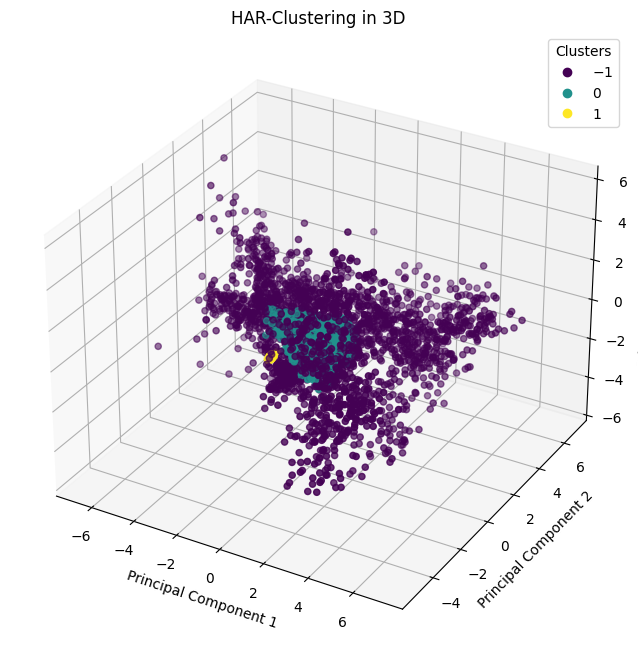

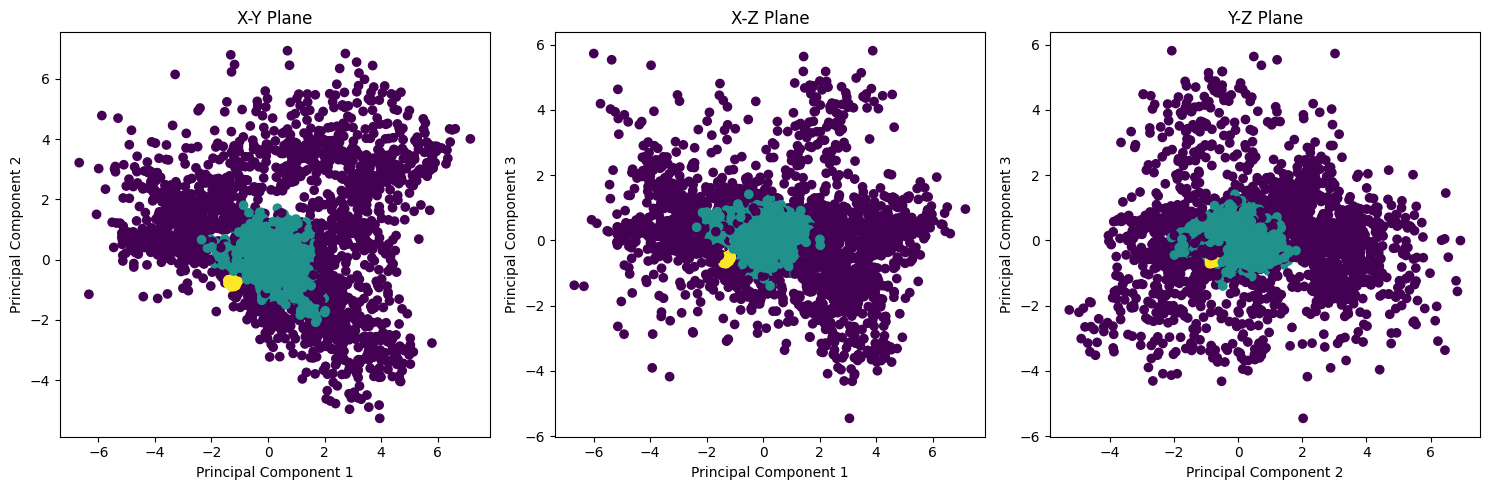

In [3]:
data_m=rolling_means(data)
#print(data_m)
data_b=get_balanced_dataset(data_m,2000)
x=data_b[['back_x','back_y','back_z','thigh_x','thigh_y','thigh_z']].reset_index(drop=True)
y=data_b['label'].reset_index(drop=True)

#print(x)
labels_db,validationdb_df=try_dbscan(x,y)
#labels_bir,validationbir_df=try_birch(x,y)

#labels,validation_df=try_minibatch_kmeans(x,y,12)
val_db=validationdb_df.value_counts()
#val_bir=validationbir_df.value_counts()
x=pca_test(x,3)
cluster3D(x,labels_db)
cluster2D(x,labels_db)

In [4]:
#val=validation_df.value_counts()
print(val_db)

real_labels  clusters
6             0          2000
7             0          2000
11            0          2000
8             1          2000
12            0          2000
3             0          2000
4             0          1999
9             0          1994
5             0          1973
1             0          1969
2            -1          1944
10            0          1814
             -1           186
2             0            56
1            -1            31
5            -1            27
9            -1             6
4            -1             1
Name: count, dtype: int64


In [3]:
# ##BAYESIAN NETWORK DATA PRE

# data_b=get_balanced_dataset(data)
# print(data_b.shape)
# data_new,labels=window_data(100,20,data_b)
# reshaped_data = np.asarray(data_new)
# flattened_data = reshaped_data.reshape(-1, 6)
# data_2d=pd.DataFrame(flattened_data,columns=['back_x','back_y','back_z','thigh_x','thigh_y','thigh_z'])
# print(data_2d.shape)
# data_2d=normal_data_MinMax(data_2d) ###test
# # print(data_2d.shape)
# data_last=data_agg(data_2d,100)
# print(data_last.shape)

(84000, 9)
(84000, 9)
(104900, 6)
(1049, 6)


In [4]:
# data_last=descritize_by_bounds(data_last)
# print(labels[1045])
# print(data_last[data_last['back_z']=='high'])
#bay_net_structure(data_last)

12
       back_x    back_y back_z   thigh_x   thigh_y thigh_z
94   very low  very low   high       low      high     avg
106       avg       low   high       avg  very low     low
173  very low      high   high  very low  very low     avg
266       avg      high   high       avg       avg     avg
312       avg      high   high       avg       avg     avg
..        ...       ...    ...       ...       ...     ...
972       avg       avg   high      high       avg     avg
975       avg      high   high      high      high    high
976      high      high   high      high      high    high
977      high      high   high      high      high    high
978       avg       avg   high      high       avg     avg

[238 rows x 6 columns]


  0%|          | 9/1000000 [00:00<1:20:25, 207.23it/s]

[('back_x', 'back_y'), ('back_y', 'back_z'), ('back_z', 'thigh_x'), ('back_z', 'thigh_y'), ('thigh_y', 'thigh_x'), ('thigh_z', 'thigh_y'), ('thigh_z', 'back_x'), ('thigh_z', 'back_y'), ('thigh_z', 'back_z')]
[<TabularCPD representing P(back_x:5 | thigh_z:5) at 0x7d70ca94f6a0>, <TabularCPD representing P(back_y:5 | back_x:5, thigh_z:5) at 0x7d70ca94f1c0>, <TabularCPD representing P(back_z:5 | back_y:5, thigh_z:5) at 0x7d70ca94eef0>, <TabularCPD representing P(thigh_x:5 | back_z:5, thigh_y:5) at 0x7d70ca94f250>, <TabularCPD representing P(thigh_y:5 | back_z:5, thigh_z:5) at 0x7d70ca94df90>, <TabularCPD representing P(thigh_z:5) at 0x7d70ca94f8b0>]


In [ ]:
#plot_histograms_qqplots(data)

In [ ]:
#descritize_by_bounds(data)
print(data[data['label']==9])

                      timestamp    back_x    back_y    back_z   thigh_x  \
344000  2019-01-12 01:58:17.640 -0.996568 -0.007743  0.056874 -0.933435   
344001  2019-01-12 01:58:17.660 -1.010615 -0.008122  0.058315 -0.942920   
344002  2019-01-12 01:58:17.680 -1.025389 -0.008199  0.079133 -0.951499   
344003  2019-01-12 01:58:17.700 -1.010200 -0.007567  0.087294 -0.956638   
344004  2019-01-12 01:58:17.720 -0.996777 -0.010144  0.089454 -0.982812   
...                         ...       ...       ...       ...       ...   
350715  2019-01-12 00:59:43.270 -0.716354  0.166793  0.314777 -0.416191   
350716  2019-01-12 00:59:43.280 -0.647655  0.224162  0.363843 -0.787831   
350717  2019-01-12 00:59:43.290 -0.649784  0.193397  0.365324 -0.609029   
350718  2019-01-12 00:59:43.300 -0.665485  0.106633  0.348973 -0.541827   
350719  2019-01-12 00:59:43.310 -0.618307  0.036586  0.287763 -0.619736   

         thigh_y   thigh_z  label Participant_ID  
344000  0.067478 -0.370939      9           S016

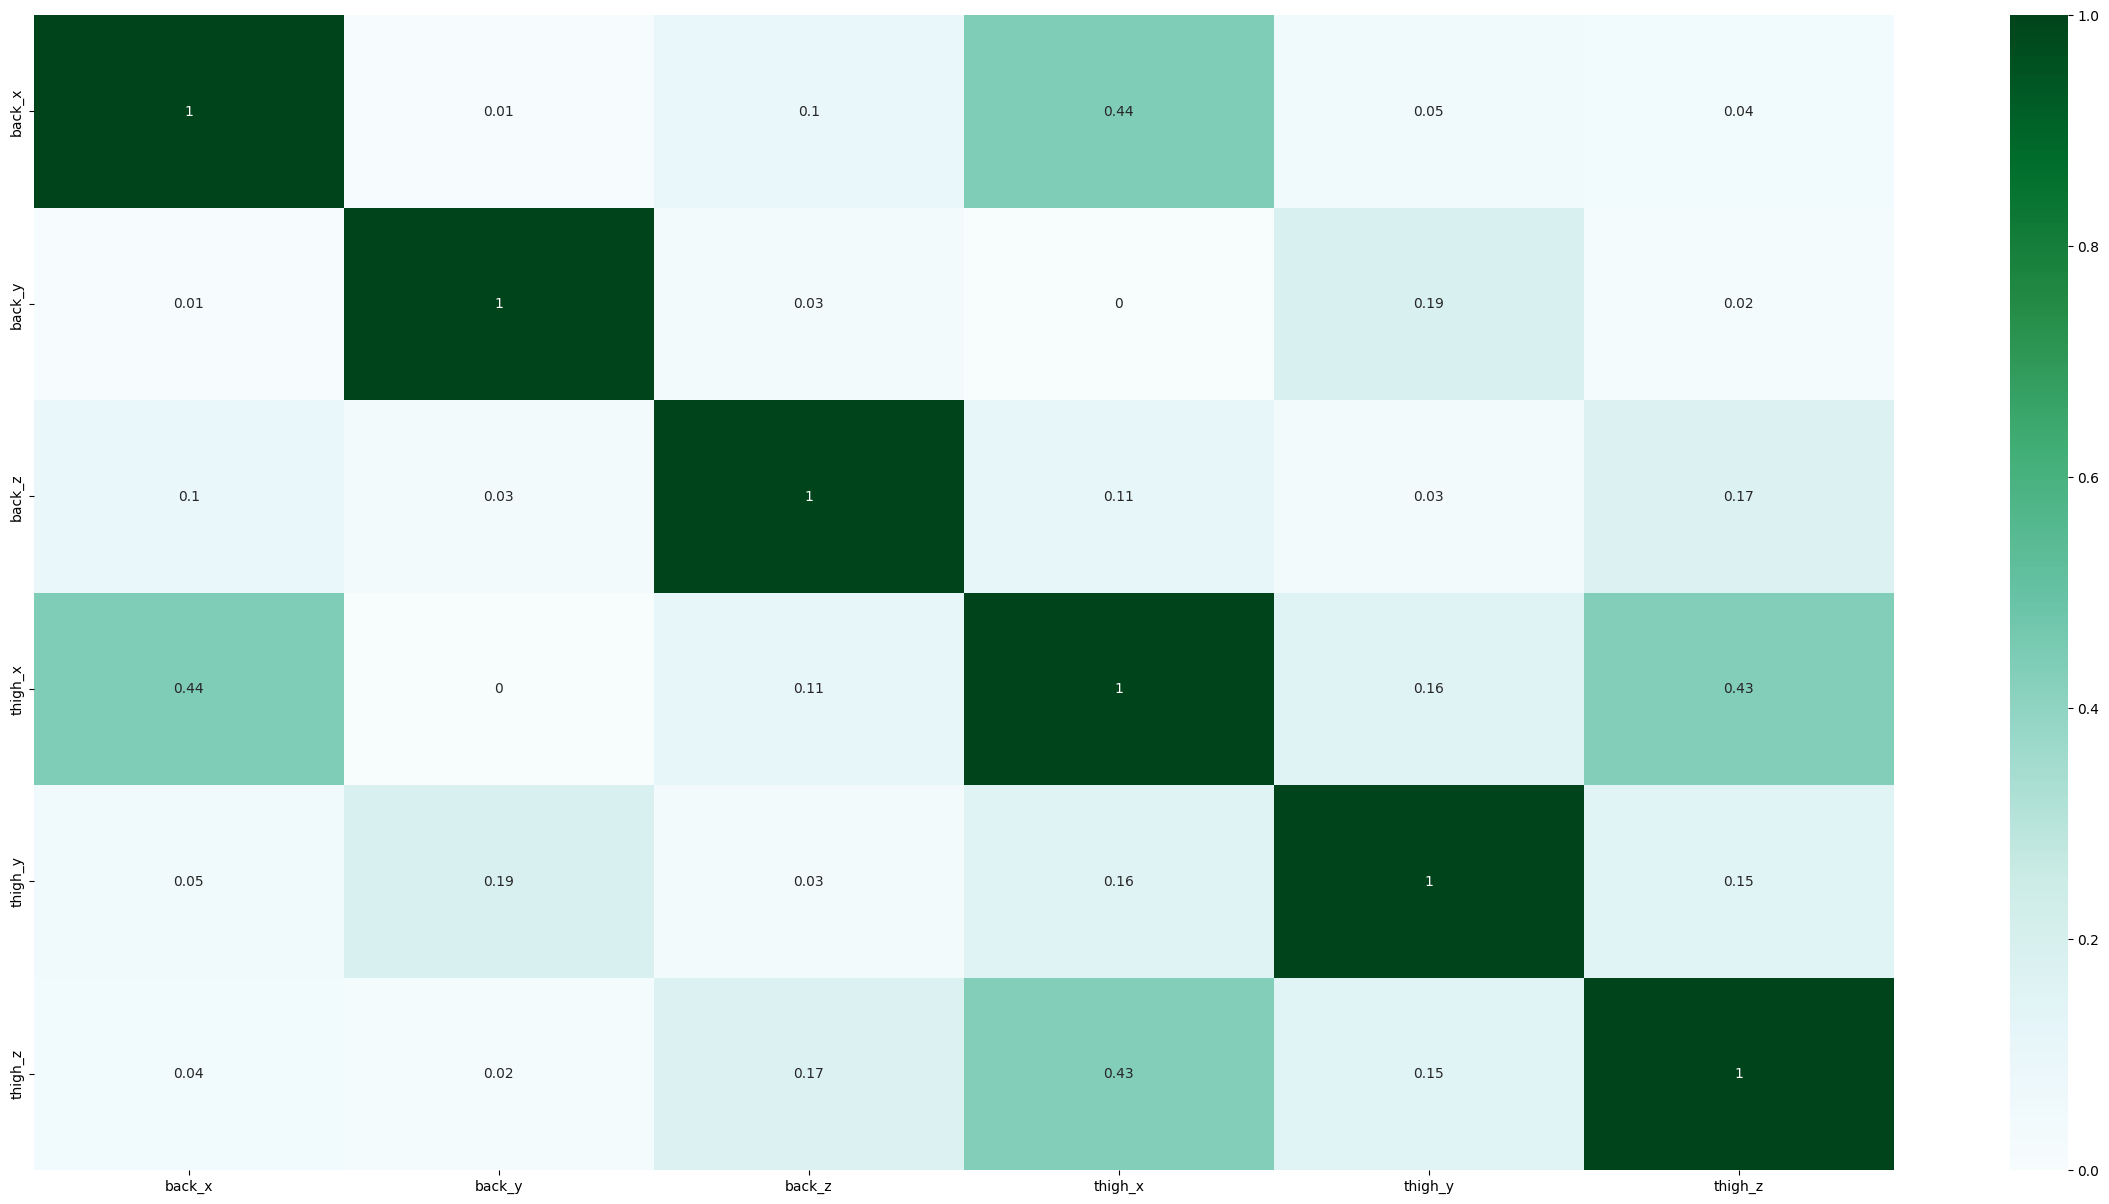

In [ ]:
create_corr_matrix(data)

In [ ]:
#test_normality_anderson(data)

In [ ]:
countofActivity=data['label'].value_counts()
print(countofActivity)

label
7     2902703
1     1197155
6      743480
8      428898
9      393963
2      291356
3      254839
4       76217
5       67253
10      55814
11      41785
12       7865
Name: count, dtype: int64


In [ ]:
balanced=get_balanced_dataset(data)
#correlation_analysis(balanced)

(84000, 9)


<Axes: title={'center': 'Training examples by activity type'}, xlabel='label'>

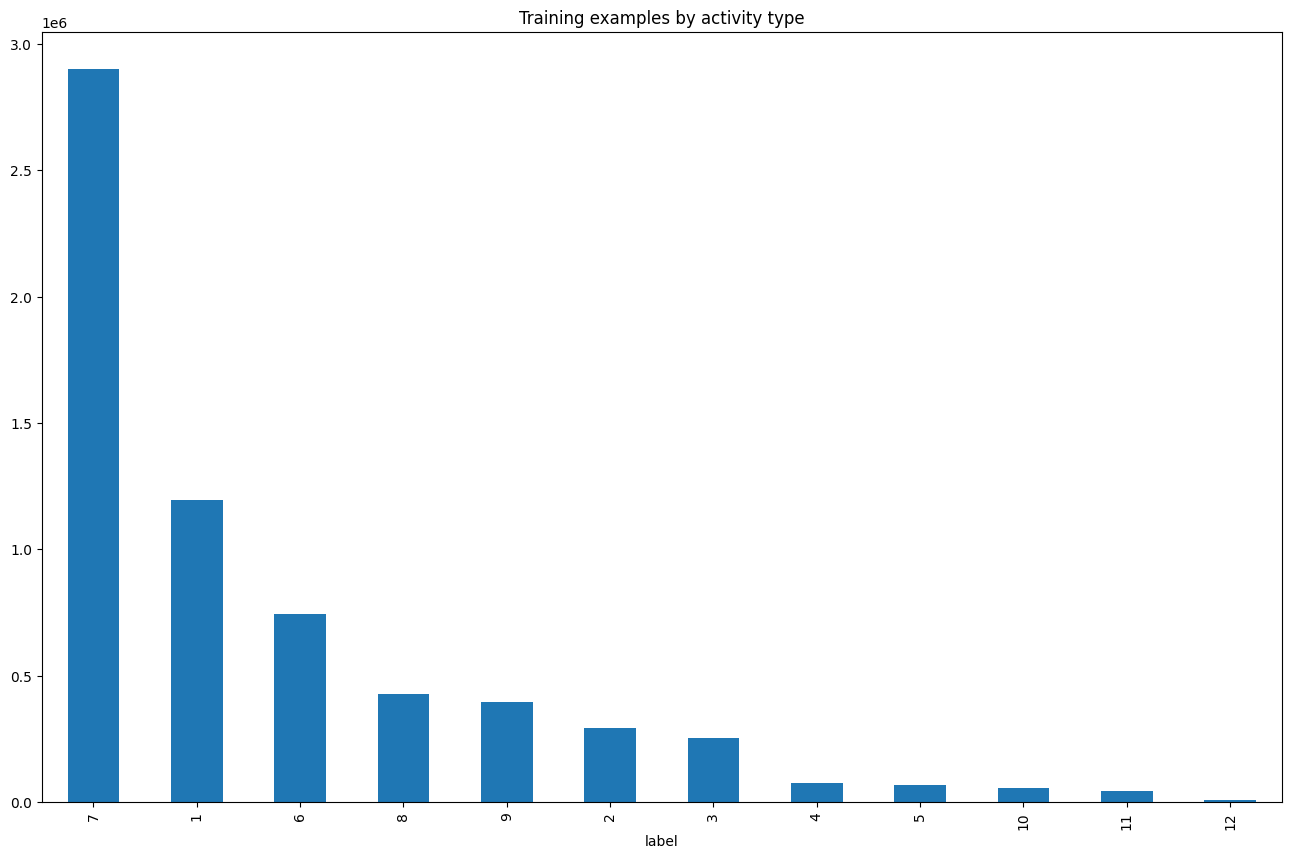

In [ ]:
countofActivity.plot(kind='bar', title='Training examples by activity type',figsize=(16,10))

<Axes: title={'center': 'Training examples by user'}, xlabel='Participant_ID'>

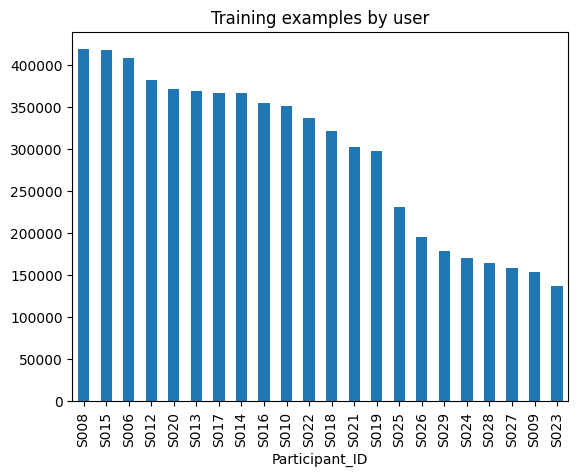

In [ ]:
data['Participant_ID'].value_counts().plot(kind='bar', title='Training examples by user')

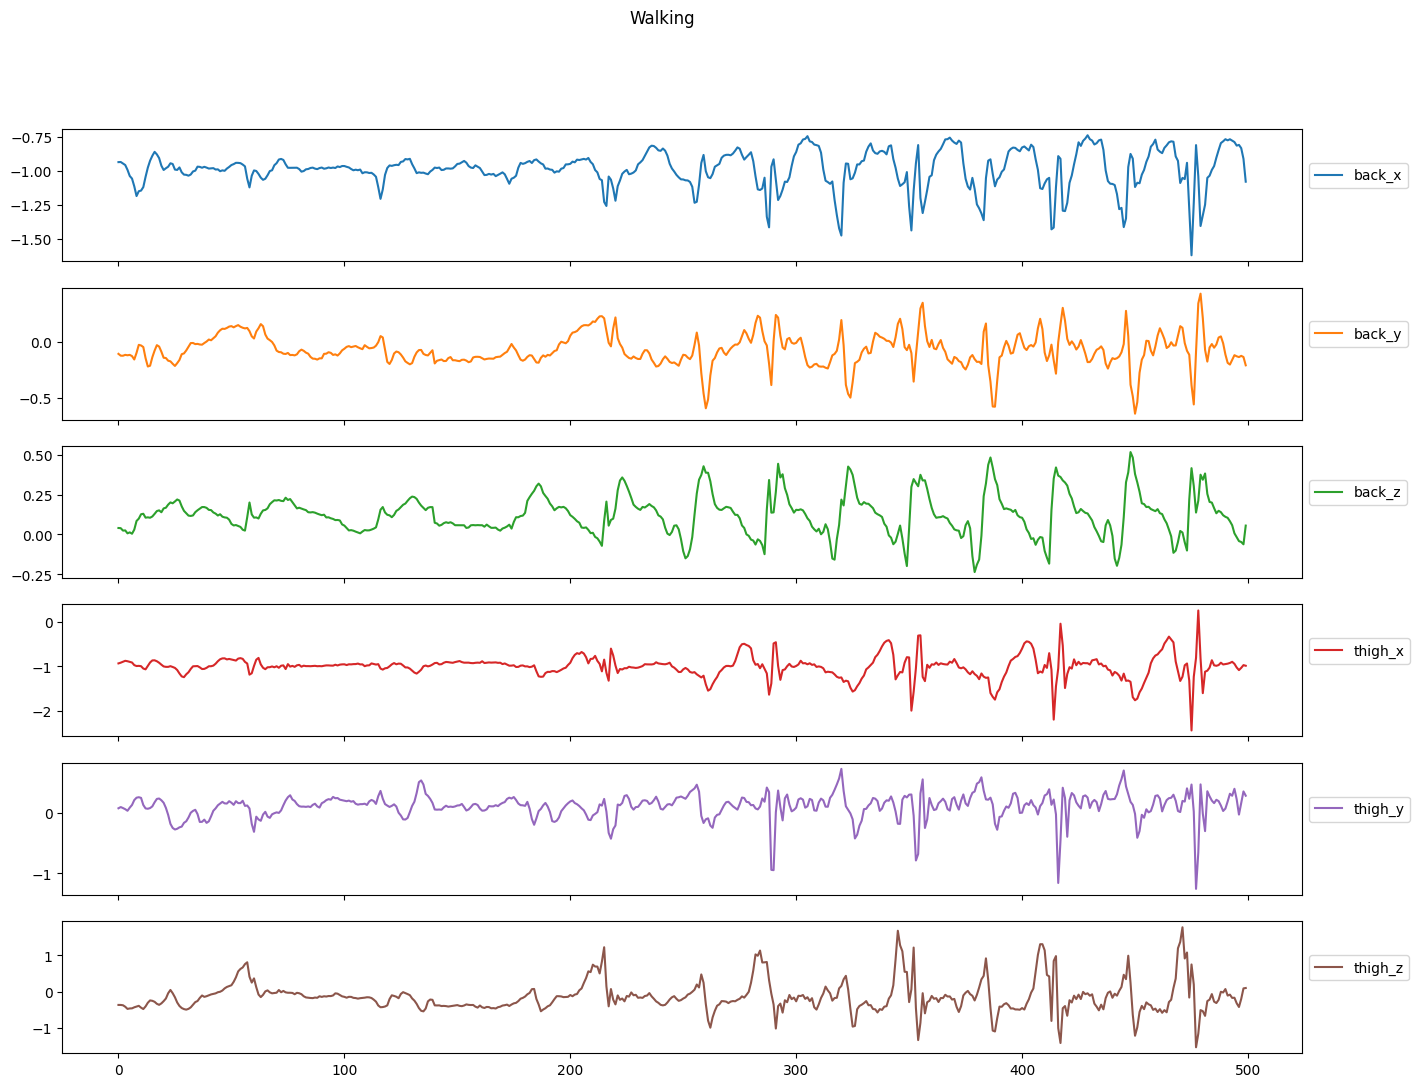

In [ ]:
plot_activity(1, data,'Walking',500)

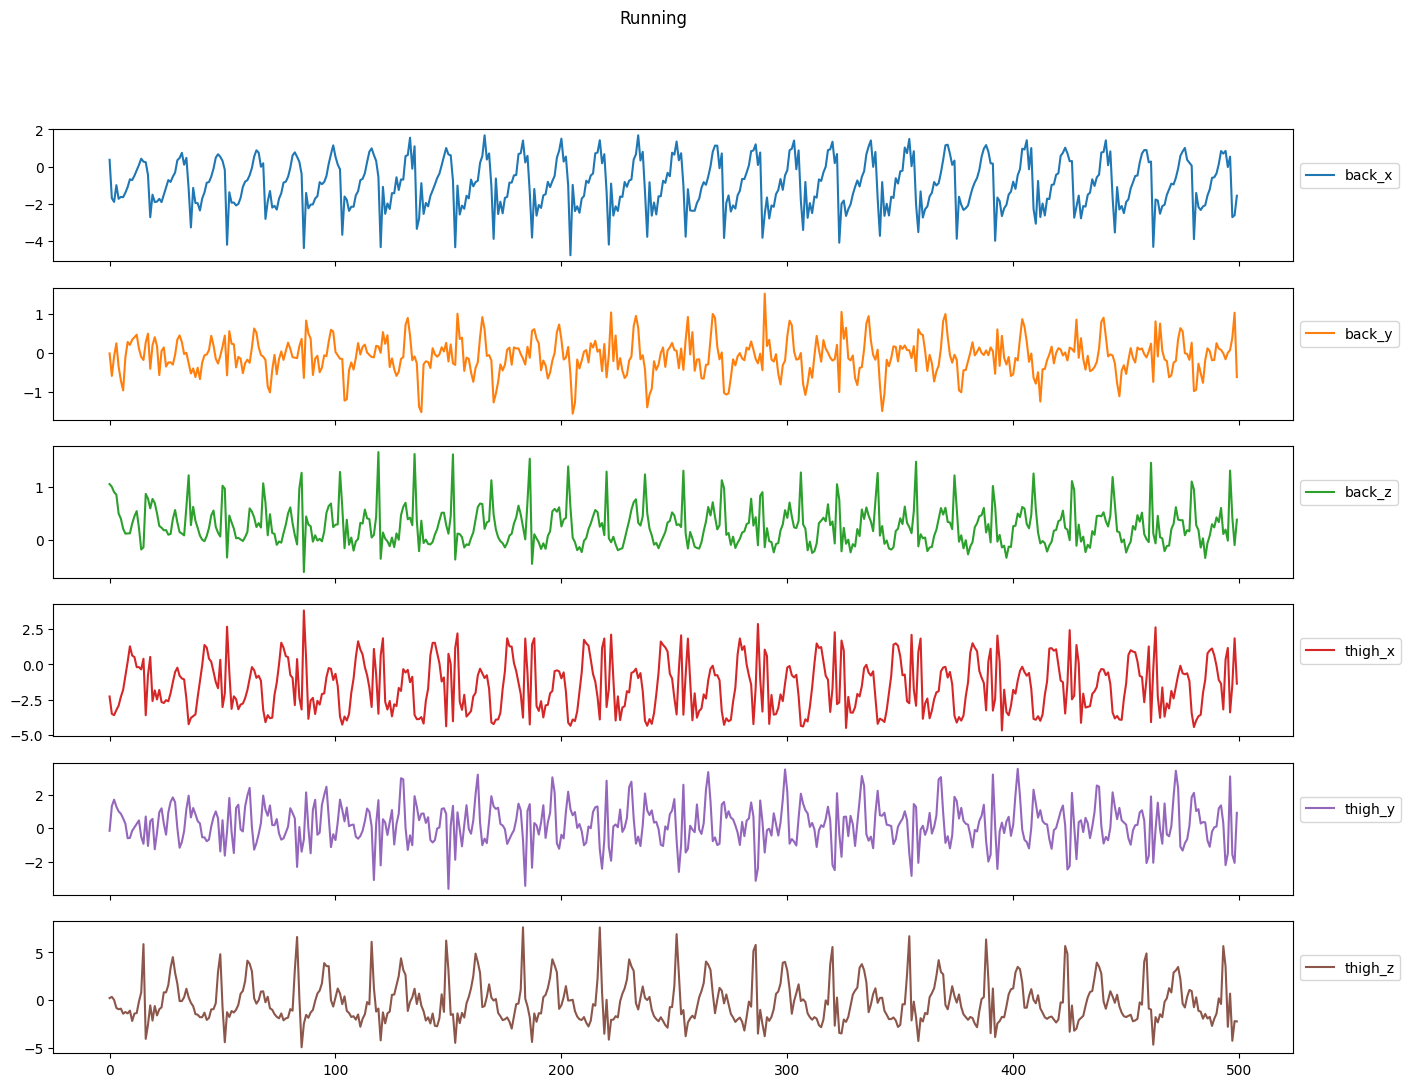

In [ ]:
plot_activity(2, data,'Running',500)

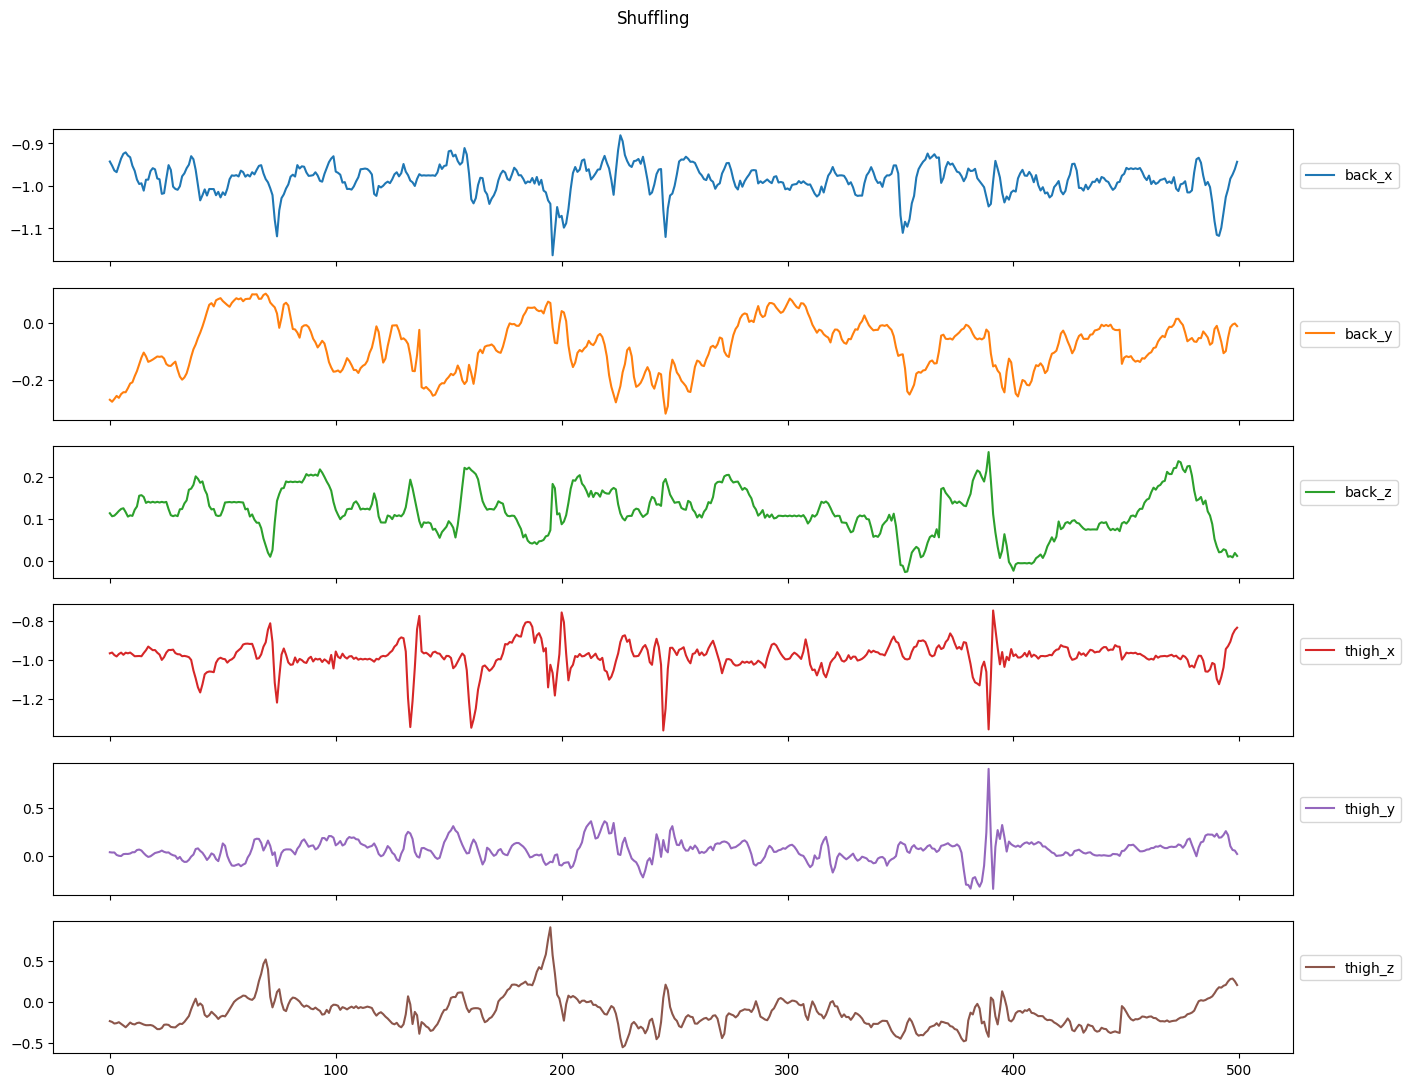

In [ ]:
plot_activity(3, data,'Shuffling',500)

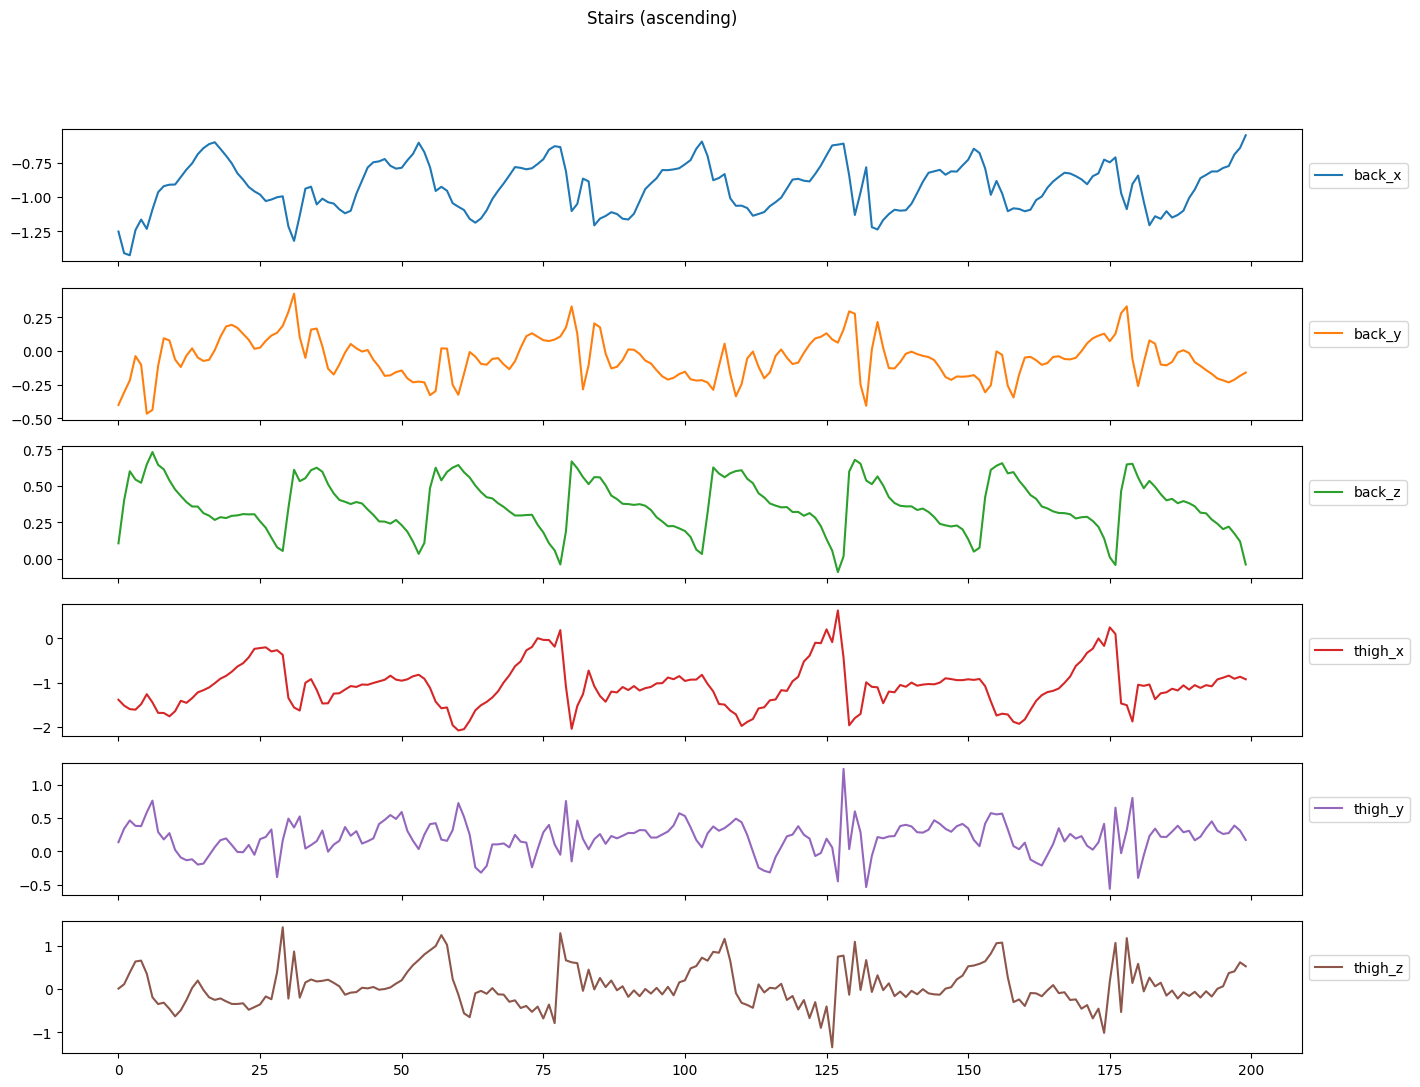

In [ ]:
plot_activity(4, data,'Stairs (ascending)',200)

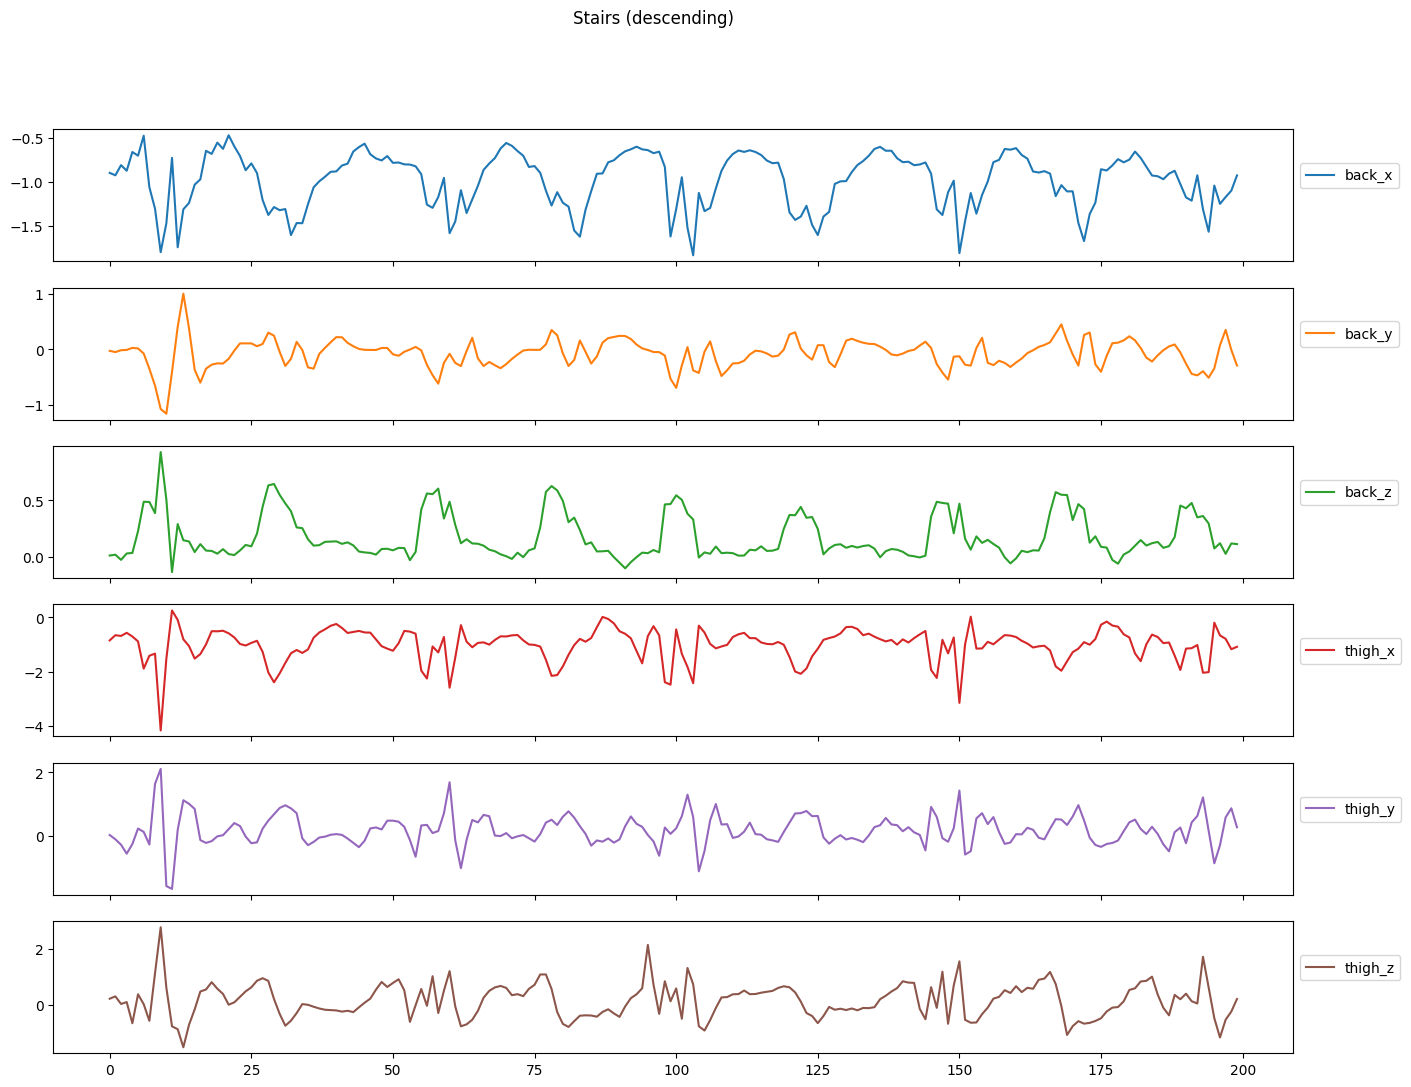

In [ ]:
plot_activity(5, data,'Stairs (descending)',200)

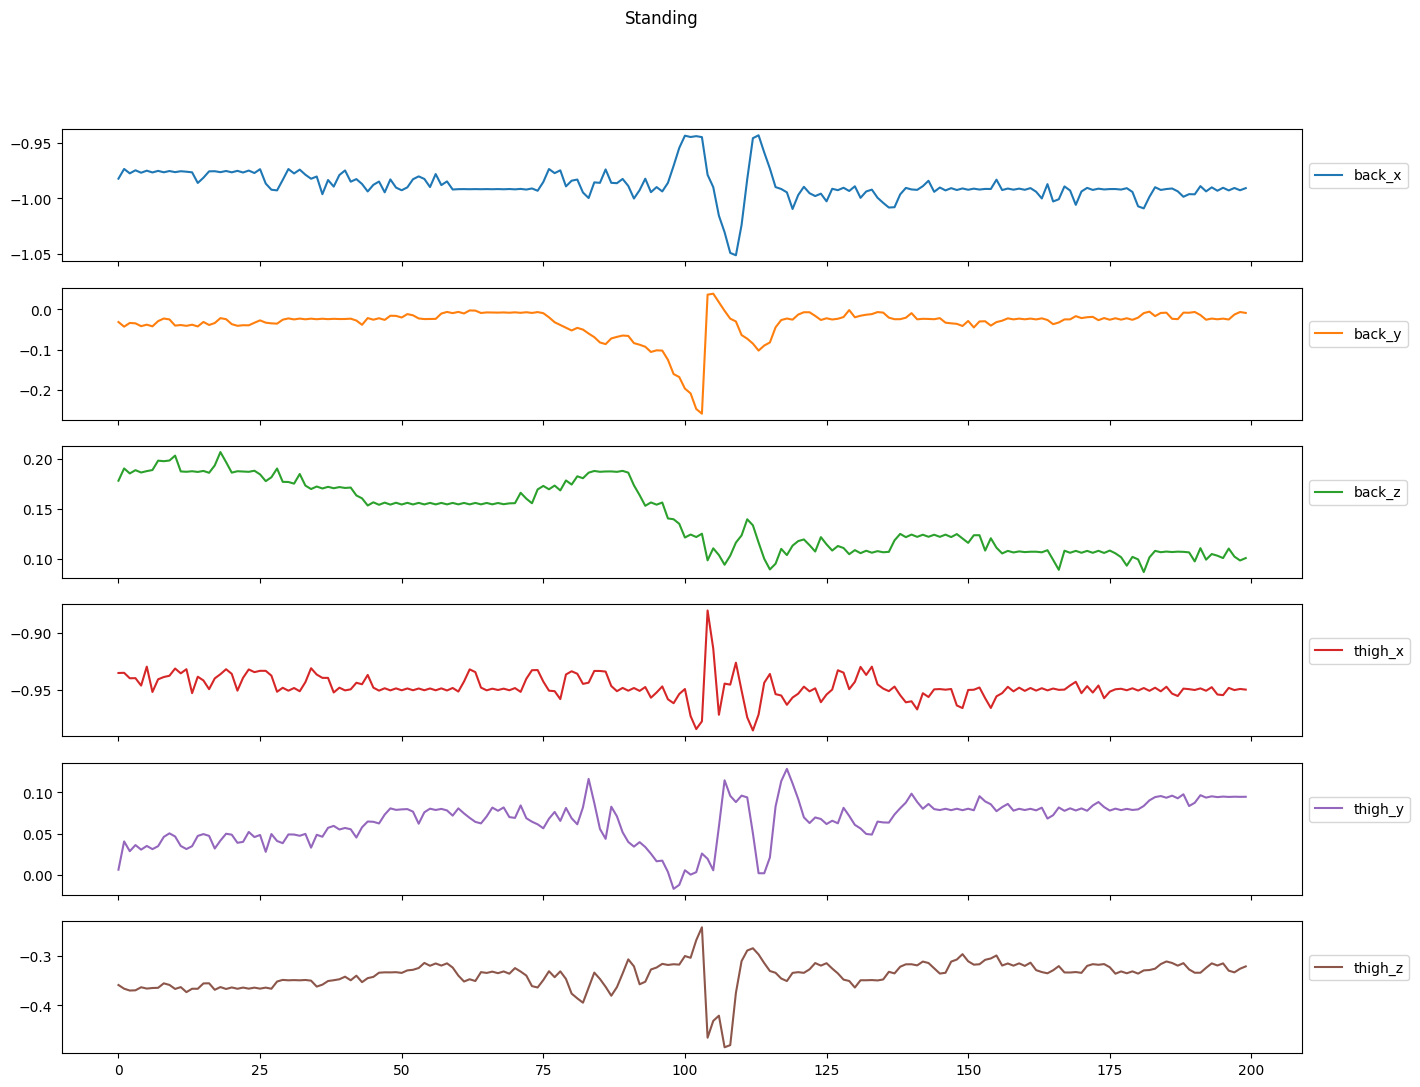

In [ ]:
plot_activity(6, data,'Standing',200)

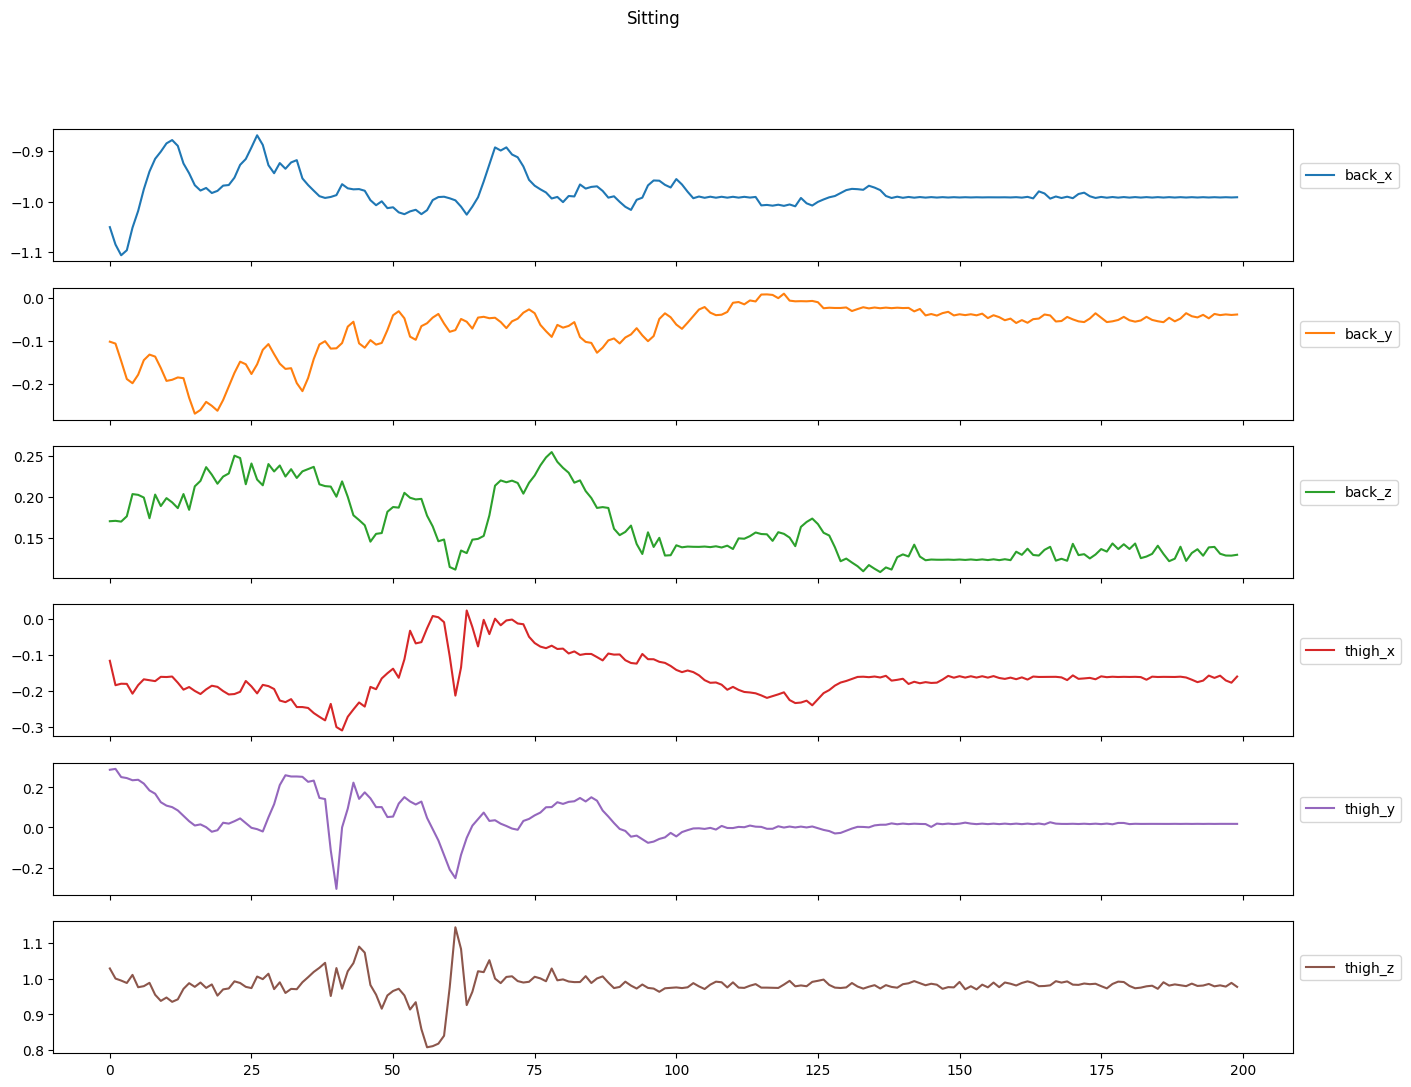

In [ ]:
plot_activity(7, data,'Sitting',200)

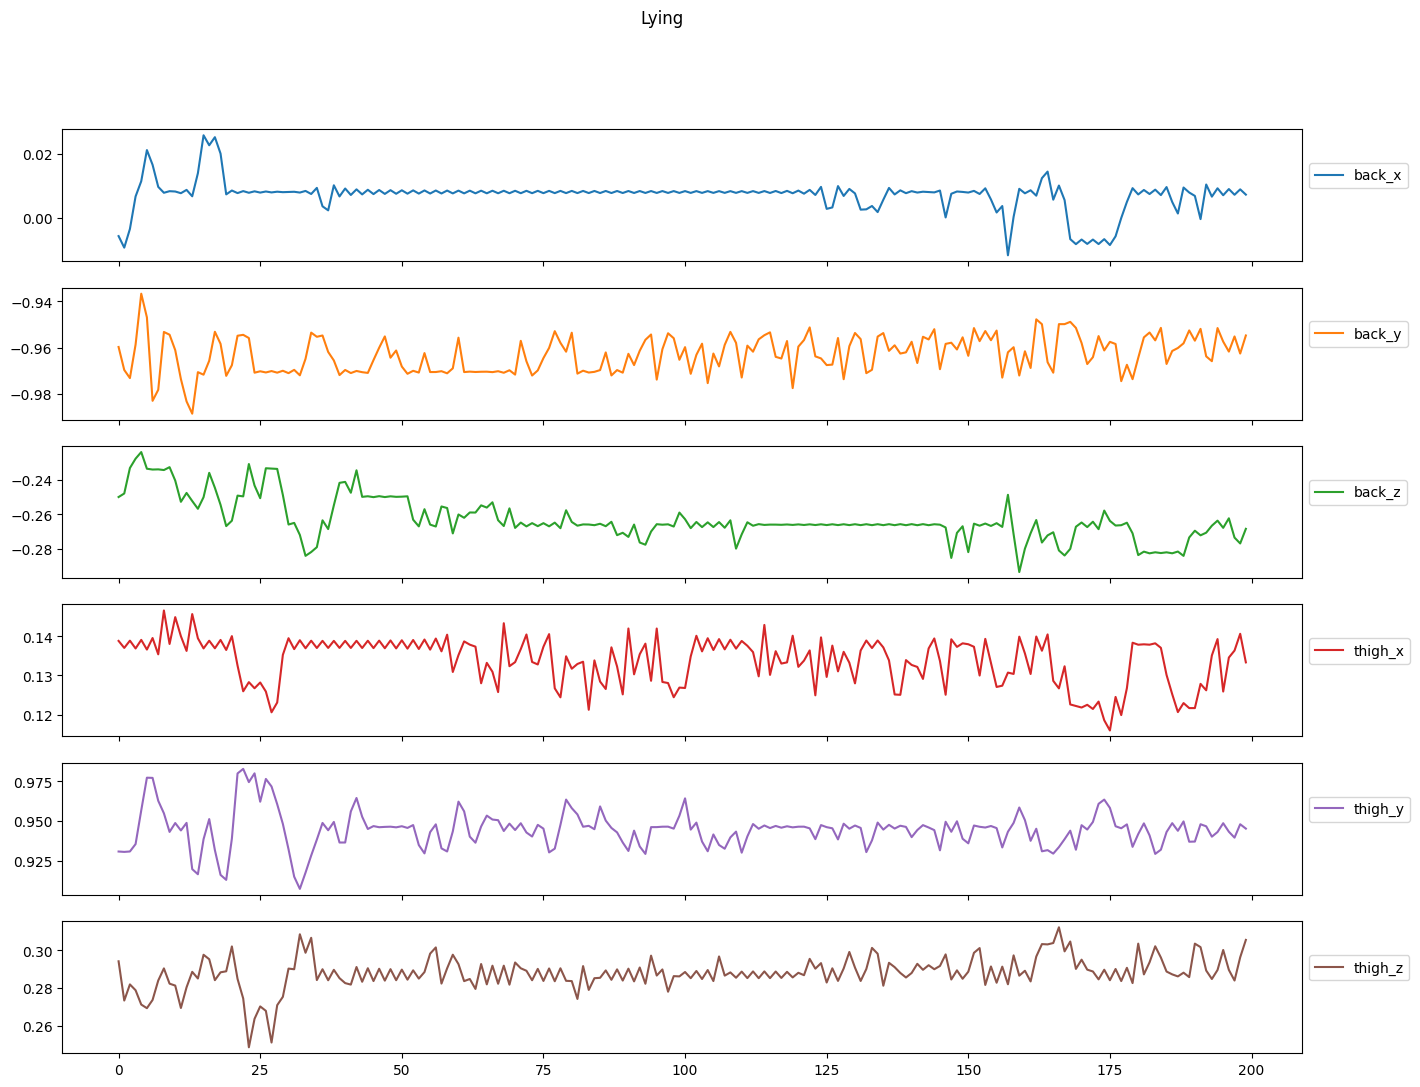

In [ ]:
plot_activity(8, data,'Lying',200)

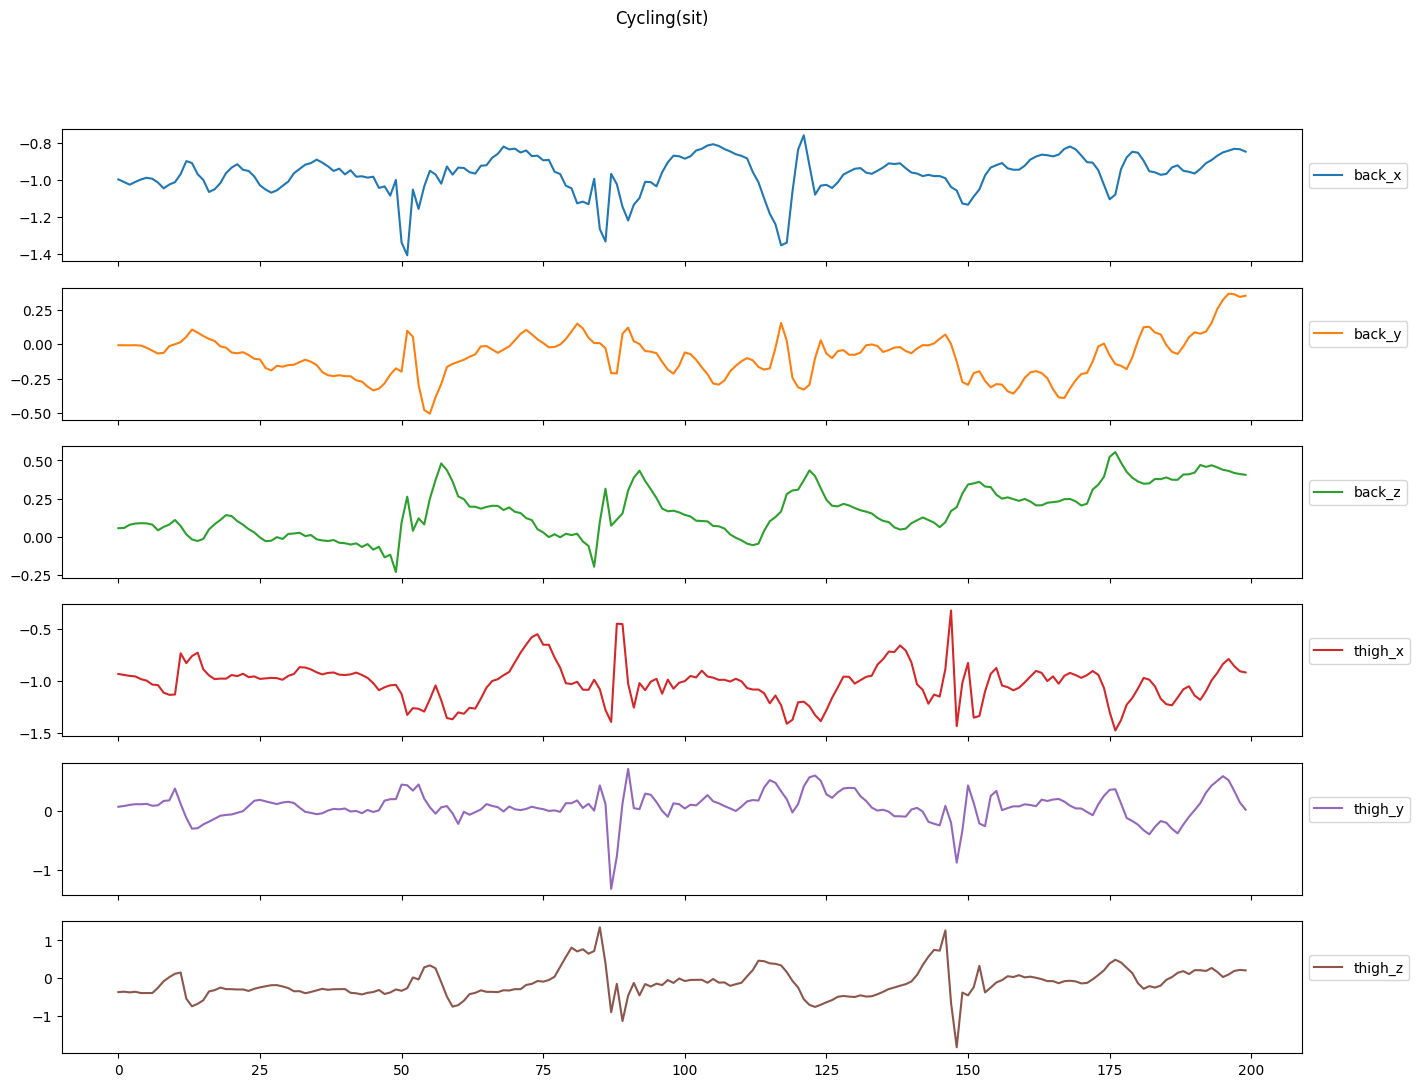

In [ ]:
plot_activity(9, data,'Cycling(sit)',200)

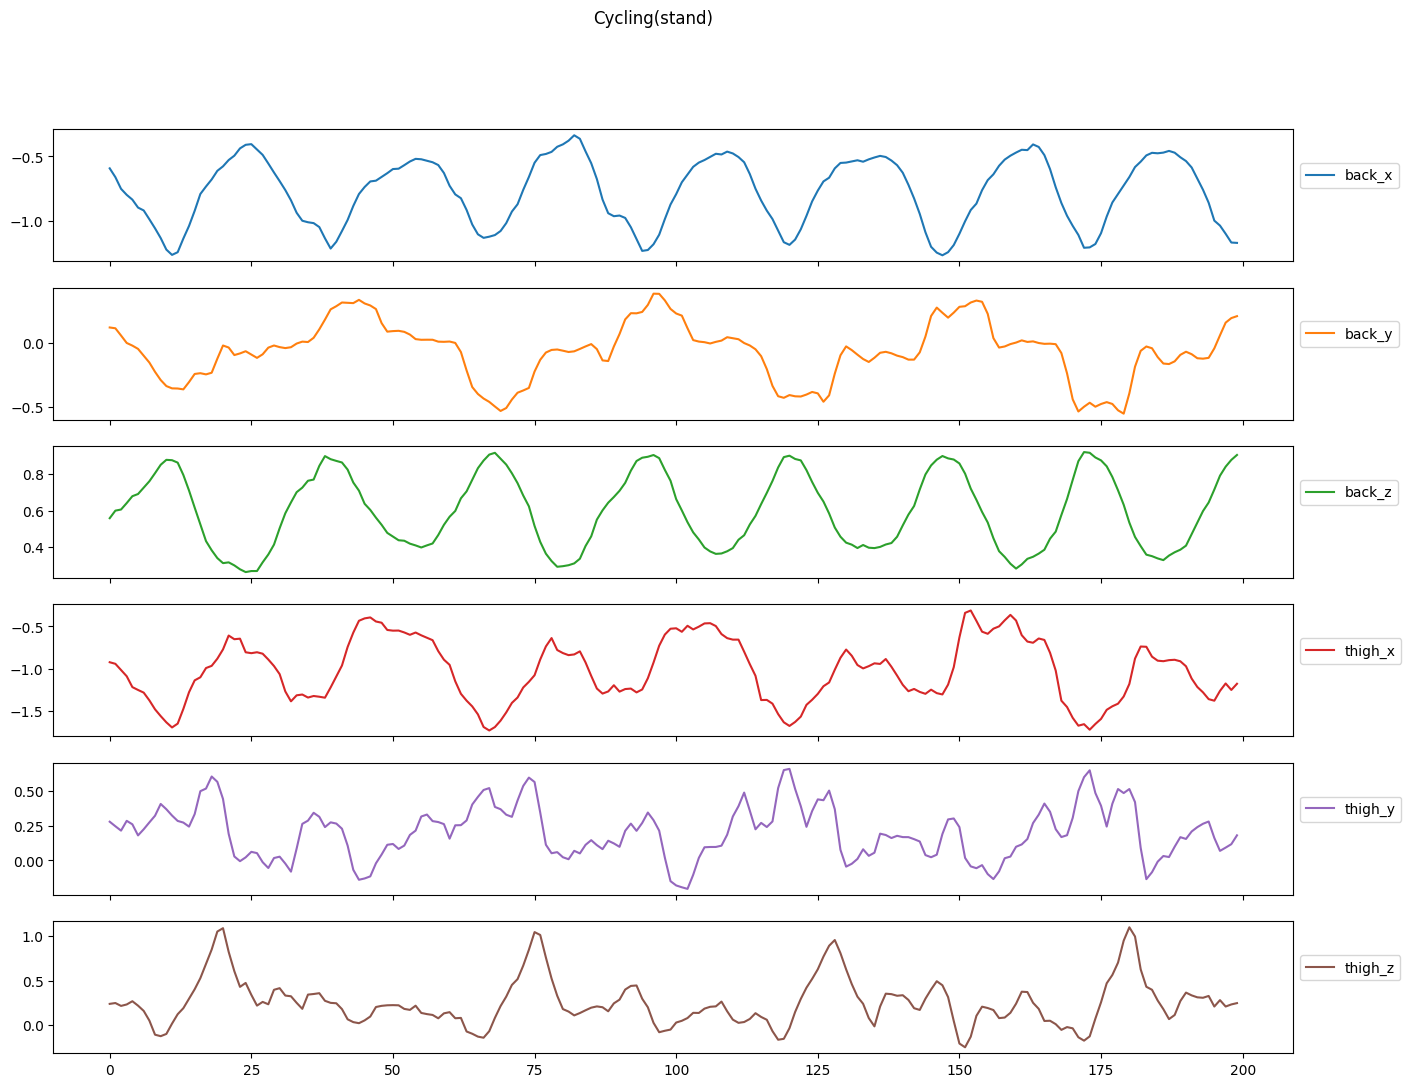

In [ ]:
plot_activity(10, data,'Cycling(stand)',200)

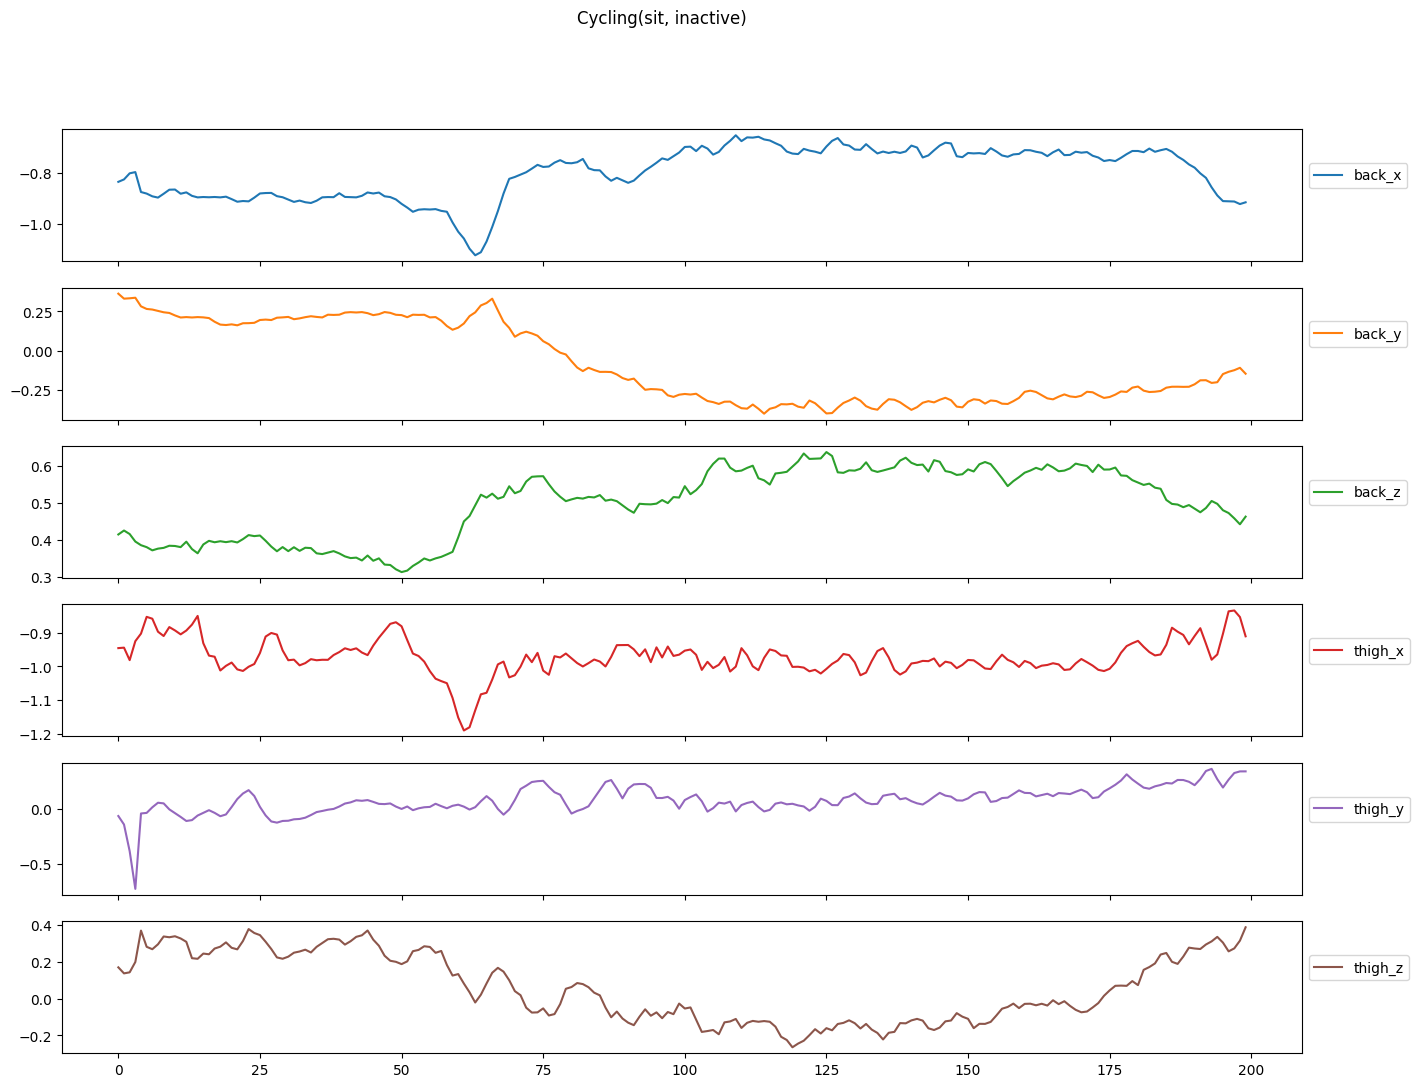

In [ ]:
plot_activity(11, data,'Cycling(sit, inactive)',200)

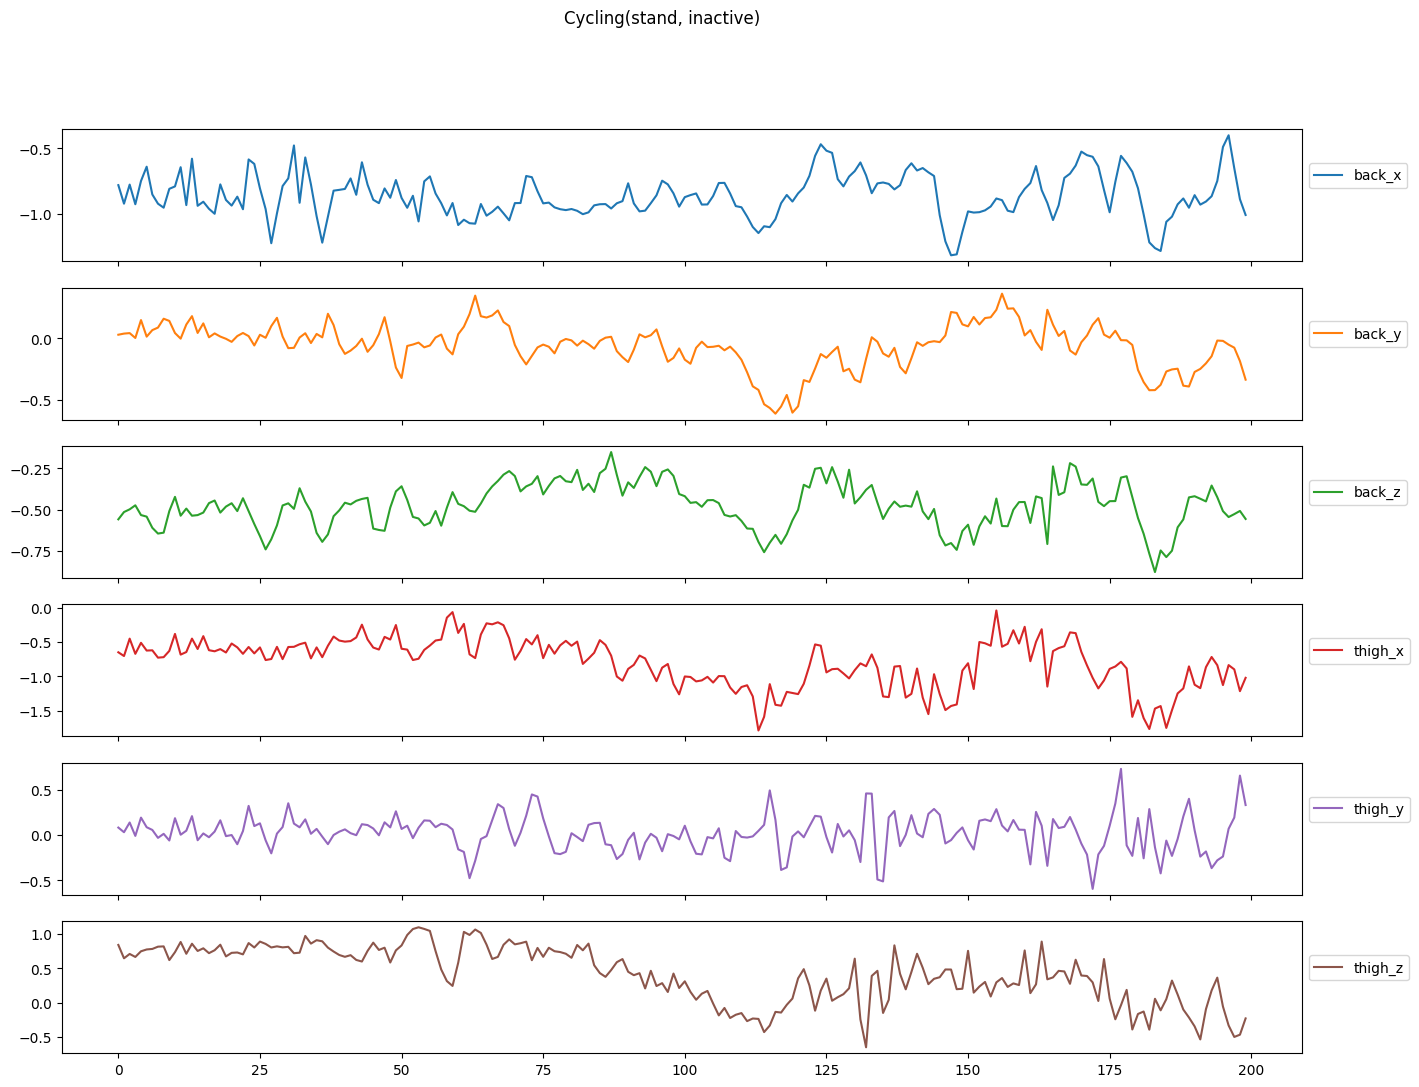

In [ ]:
plot_activity(12, data,'Cycling(stand, inactive)',200)

In [ ]:
#data_new,labels=window_data(200,50,data)


In [ ]:
# reshaped_data = np.asarray(data_new)
# labels_ar=np.asarray(labels)
# reshaped_data = reshaped_data.astype(float).reshape(-1, 200, 6)


In [ ]:
# print(data[2850:3050]['label'].value_counts())
# print(len(data_new))
# print(len(labels_ar))

In [ ]:
# print(reshaped_data.shape)
# reshaped_data_nn=reshaped_data.reshape(-1,200,6,1)
# model, evaluation_results = nn(reshaped_data_nn, labels_ar)
# print("Evaluation results:", evaluation_results)

In [ ]:
#display(random_forest(data[['back_x','back_y','back_z','thigh_x','thigh_y','thigh_z']][0:100000],data[['label']][0:100000]))